In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from neuralop import LpLoss, H1Loss
from neuralop import Trainer
from neuralop.training import AdamW
from neuralop.models import FNO1d
from torch.utils.data import DataLoader
from data.tecplot import *
from utils.utils import *

os.environ["CUDA_VISIBLE_DEVICES"]="0" 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
args = objectview({
    'model' : FNO1d,
    'model_args': {
        'n_modes_height' : 32,
        'hidden_channels' : 64,
        'in_channels' : 15,
        'out_channels' : 3,
        'n_layers' : 10
    },
    'train_args': {
        'device' : torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'),
        'optimizer' : AdamW,
        'lr' : 5e-4,
        'weight_decay' : 1e-4,
        'scheduler' : torch.optim.lr_scheduler.CosineAnnealingLR,
        'loss' : H1Loss(d=2)
    },
    'inference_args': {
        'device' : torch.device('cpu')
    }
})

In [2]:
data_names = [
    '../data/it01rh_400-500_slice_trachea.dat',
    '../data/it01rh_501-600_slice_trachea.dat',
    '../data/it01rh_601-700_slice_trachea.dat',
    '../data/it01rh_701-800_slice_trachea.dat'
]
dataset = load_tecplot_to_pt_dataset(
    root_dir='../data/',
    dataset_name='tecplot_slice',
    n_train=200, 
    n_test=100, 
    resolution='medium',
    batch_size=20,
    normalize=True,
    file_names=data_names,
)

In [3]:
loader = DataLoader(
    dataset.train_db, 
    batch_size=10, 
    num_workers=0, 
    pin_memory=False, 
    persistent_workers=False
)

In [ ]:
model = args.model(**args.model_args).to(args.train_args['device'])
optimizer = args.train_args['optimizer'](
    model.parameters(), 
    lr=args.train_args['lr'], 
    weight_decay=args.train_args['weight_decay']
)
if args.train_args['scheduler'] is not None:
    scheduler = args.train_args['scheduler'](optimizer, T_max=30)
train_loss = args.train_args['loss']

In [5]:
# trainer = Trainer(
#     model = model,
#     n_epochs = 1000,
#     device = device
# )
# model.train()
# trainer.train(
#     train_loader = loader,
#     test_loaders = {},
#     optimizer = optimizer,
#     scheduler = scheduler,
#     regularizer = False,
#     training_loss = train_loss,
#     save_every = 1,
#     save_dir = '../checkpoints/'
# )

In [ ]:
# model = FNO1d(
#     n_modes_height=32,
#     hidden_channels=64,
#     in_channels=15,
#     out_channels=3,
    
# ).to(torch.device('cpu'))
# model.load_state_dict(torch.load('../checkpoints/model_state_dict.pt', weights_only=False))

<All keys matched successfully>

In [ ]:
# data = next(iter(loader))
# output = recurrent_formulation(
#     model,
#     initial_input=data['x'][0].unsqueeze(0).float().to(device),
#     n_iteration=20,
#     n_timesteps=5,
#     n_variables=3,
#     device=torch.device('cpu'),
# )

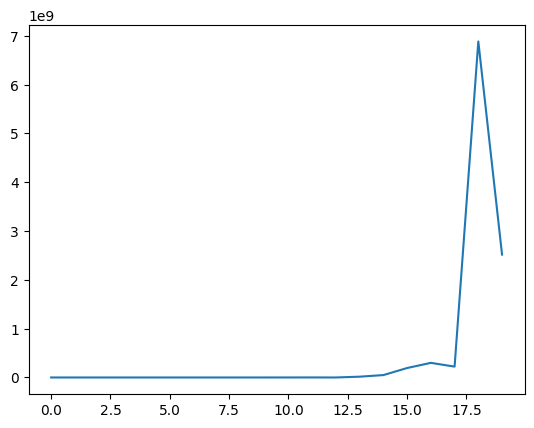

In [ ]:
# import matplotlib.pyplot as plt

# y = output[0,2,:,700].detach().numpy()
# plt.plot(y)
# plt.show()